In [64]:
import pandas as pd
import numpy as np

In [65]:
df=pd.read_csv('book (1).csv',encoding='latin1')
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [66]:
df.shape


(10000, 4)

In [67]:
df.isna().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.rename({'User.ID':'User_Id','Book.Title':'Book_title','Book.Rating':'Ratings'},axis=1,inplace=True)
df.head()

,User_Id,Book_title,Ratings
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [7]:
df[df.duplicated()]

,User_Id,Book_title,Ratings
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [8]:
df.drop_duplicates(inplace=True)


In [9]:
df.shape

(9998, 3)

In [10]:
df.User_Id.value_counts().sort_values(ascending=False)

3757      522
162052    214
2276      212
4017      156
277427    150
         ... 
160894      1
160899      1
160909      1
160917      1
162129      1
Name: User_Id, Length: 2182, dtype: int64

In [11]:
df.Ratings.value_counts().sort_values(ascending=False)

8     2283
7     2074
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Ratings, dtype: int64

In [12]:
low_ratings = df[df['Ratings']<5]
low_ratings

,User_Id,Book_title,Ratings
1,276729,Clara Callan,3
19,276762,Beloved (Plume Contemporary Fiction),3
20,276762,Our Dumb Century: The Onion Presents 100 Years...,4
21,276768,New Vegetarian: Bold and Beautiful Recipes for...,4
115,276853,A Kiss Remembered,1
...,...,...,...
9942,162052,The Concrete Enema: And Other News of the Weir...,2
9943,162052,Empire Falls,4
9947,162052,Cloudsplitter,4
9948,162052,Leaving Home,1


In [13]:
neutral_ratings = df[df['Ratings']==5]
neutral_ratings

,User_Id,Book_title,Ratings
0,276726,Classical Mythology,5
15,276755,The Witchfinder (Amos Walker Mystery Series),5
17,276762,Goodbye to the Buttermilk Sky,5
35,276796,Tage der Unschuld.,5
36,276798,Lying Awake,5
...,...,...,...
9970,162063,Five Quarters of the Orange,5
9973,162085,To Asmara,5
9978,162092,Cherry,5
9979,162092,Tending to Virginia,5


In [14]:
high_ratings = df[df['Ratings']>5]
high_ratings

,User_Id,Book_title,Ratings
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
5,276744,The Kitchen God's Wife,7
6,276745,What If?: The World's Foremost Military Histor...,10
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [15]:
top_10_books = high_ratings.Book_title.value_counts().head(10)
top_10_books

Fahrenheit 451                                     4
The Subtle Knife (His Dark Materials, Book 2)      4
Stardust                                           4
Pet Sematary                                       3
Suzanne's Diary for Nicholas                       3
The Amber Spyglass (His Dark Materials, Book 3)    3
The Golden Compass (His Dark Materials, Book 1)    3
Wuthering Heights                                  3
Vanished                                           3
Pride and Prejudice                                3
Name: Book_title, dtype: int64

In [16]:
mycolors = ["#023535","#015958","#008F8C","#0CABA8","#0FC2C0","#04BF8A","#025940","#03A64A","#F27457","#BF665E"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

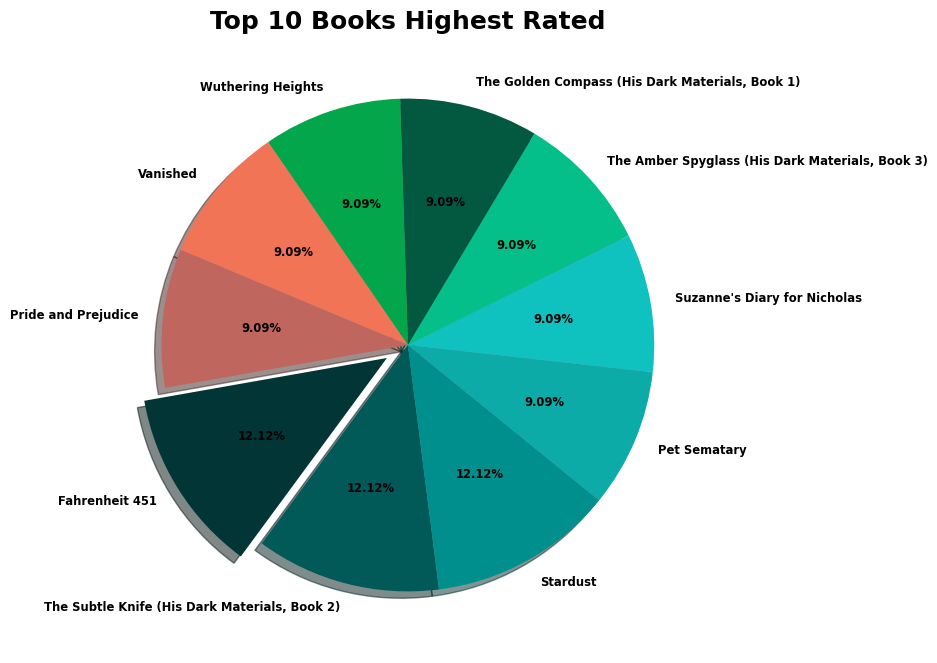

In [17]:
#plotting for top 10 books with highest rating 
plt.figure(figsize=(10,8))
plt.pie(top_10_books,
       labels = top_10_books.index,
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct='%.2f%%',
       shadow=True,
       colors = mycolors,
       startangle=190,
       textprops={'size':'small',
                 'fontweight':'bold',
                 
                 'color':'black'})
plt.title("Top 10 Books Highest Rated",fontsize = 18,fontweight = 'bold')
plt.show()

In [18]:
top_10_low_books = low_ratings.Book_title.value_counts().tail(10)
top_10_low_books

Four To Score (A Stephanie Plum Novel)                    1
Shadowrun: Nosferatu (Shadowrun (Roc))                    1
To the Nines: A Stephanie Plum Novel                      1
Woman, Thou Art Loosed: Healing the Wounds of the Past    1
All I Asking for Is My Body (Kolowalu Book)               1
Tar Baby                                                  1
ANGELA'S ASHES                                            1
Lame (Collection Sextant)                                 1
Sons from Afar                                            1
The Millstone                                             1
Name: Book_title, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

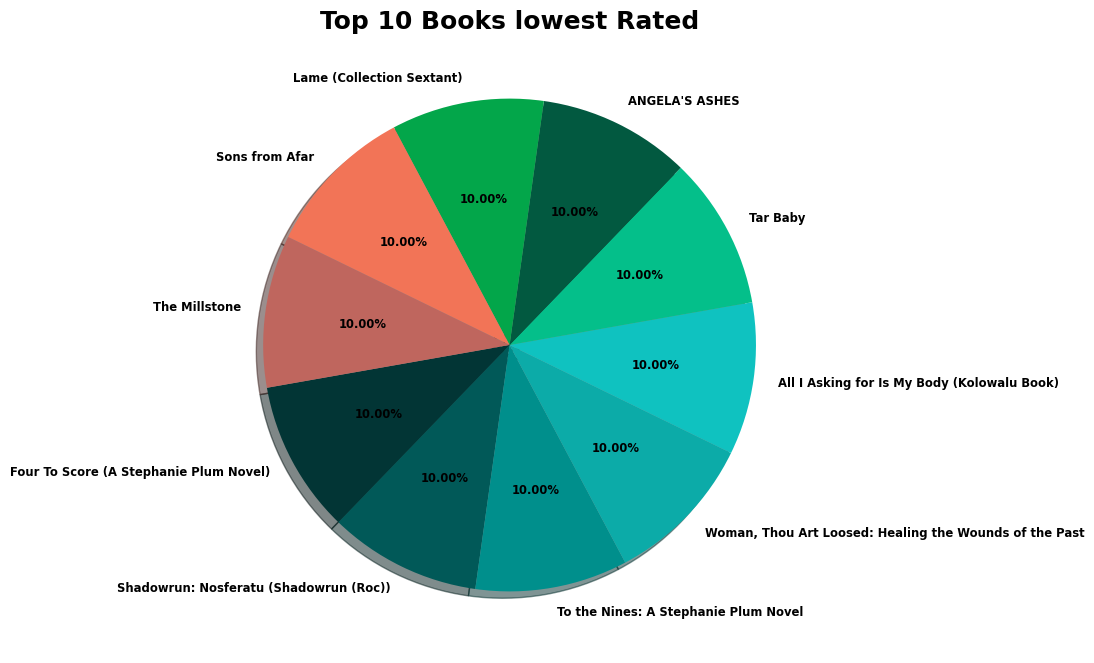

In [19]:
#plotting for top 10 books with lowest rating 
plt.figure(figsize=(12,8))
plt.pie(top_10_low_books,
       labels = top_10_low_books.index,
       explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct='%.2f%%',
       shadow=True,
       colors = mycolors,
       startangle=190,
       textprops={'size':'small',
                 'fontweight':'bold',
                 
                 'color':'black'})
plt.title("Top 10 Books lowest Rated",fontsize = 18,fontweight = 'bold')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Recurrence of Ratings')

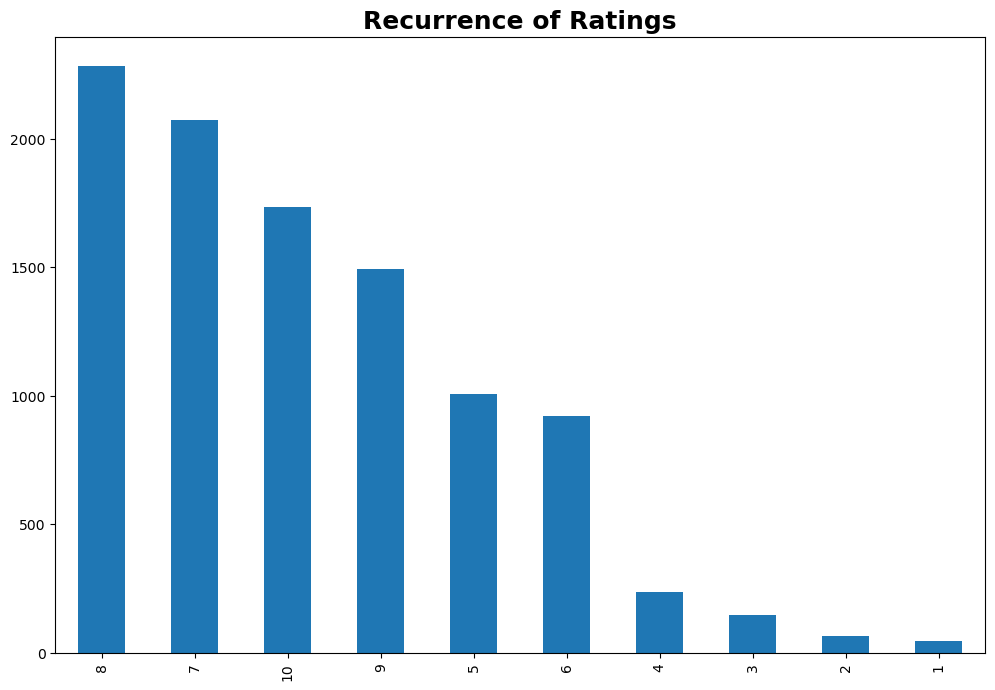

In [20]:
#plotting to check frequency of ratngs 
plt.figure(figsize=(12,8))
df['Ratings'].value_counts().plot(kind='bar')
plt.title('Recurrence of Ratings',fontsize = 18,fontweight = 'bold')


In [21]:
#grouping to compute the count of total ratings 
df.groupby('Book_title')['Ratings'].count().sort_values(ascending = False).head(10)

Book_title
Fahrenheit 451                                     5
Vanished                                           4
Stardust                                           4
Ender's Game (Ender Wiggins Saga (Paperback))      4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
Charlie and the Chocolate Factory                  4
The Hitchhiker's Guide to the Galaxy               3
The Golden Compass (His Dark Materials, Book 1)    3
My Side of the Mountain                            3
Name: Ratings, dtype: int64

In [22]:
#creating a dataframe for average rating for titles
ratings = pd.DataFrame(df.groupby('Book_title')['Ratings'].mean())
ratings.head()

,Ratings
Book_title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [23]:
#groupiing and calculating numbe rof ratings for each book 
ratings['num of ratings'] = pd.DataFrame(df.groupby('Book_title')['Ratings'].count())
ratings.head()

,Ratings,num of ratings
Book_title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


In [24]:
#creating our pivot table 
user_books_df = df.pivot_table(index='User_Id',columns='Book_title',values = 'Ratings',fill_value=0)
user_books_df

Book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_Id,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0


In [25]:
#sorting ratings descending order 
ratings.sort_values('num of ratings',ascending=False).head(10)


,Ratings,num of ratings
Book_title,,
Fahrenheit 451,7.000000,5
Vanished,6.500000,4
Stardust,8.500000,4
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
Charlie and the Chocolate Factory,6.500000,4
The Hitchhiker's Guide to the Galaxy,8.333333,3
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3


In [26]:
#taking any two books with higher ratings 
Fahrenheit_user_ratings = user_books_df['Fahrenheit 451']
Vanished_user_ratings = user_books_df['Vanished']
Vanished_user_ratings.head()

User_Id
8     0
9     0
10    0
12    0
14    0
Name: Vanished, dtype: int64

In [27]:
#using the correlation method 
sim_fahrenheit = user_books_df.corrwith(Fahrenheit_user_ratings)
sim_vanished = user_books_df.corrwith(Vanished_user_ratings)
corr_vanished = pd.DataFrame(sim_vanished,columns=['correlation'])
corr_vanished.dropna(inplace=True)
corr_vanished.head()

,correlation
Book_title,
"Jason, Madison &amp",-0.000904
Other Stories;Merril;1985;McClelland &amp,-0.000904
Repairing PC Drives &amp,-0.000904
'48,-0.000904
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000904


In [28]:
#sorting values of correlation 
corr = corr_vanished.sort_values('correlation',ascending=False).head(10)
corr


,correlation
Book_title,
Vanished,1.000000
Donovan's Station: A Novel,0.454464
The Northern Lights,0.454464
Downhill Chance,0.454464
Canoe Lake,0.454464
Last Summer at Barebones,0.454464
"So Long, See You Tomorrow",0.454464
Home From the Vinyl Cafe,0.454464
Notes from the Hyena's Belly: Memories of My Ethiopian Boyhood,0.454464


In [29]:
#joining our ratings 
corr_vanished = corr_vanished.join(ratings['Ratings'])
corr_vanished.head()

,correlation,Ratings
Book_title,,
"Jason, Madison &amp",-0.000904,8.0
Other Stories;Merril;1985;McClelland &amp,-0.000904,6.0
Repairing PC Drives &amp,-0.000904,4.0
'48,-0.000904,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000904,8.0


In [30]:
corr_vanished = corr_vanished.join(ratings['num of ratings'])
corr_vanished.head()


,correlation,Ratings,num of ratings
Book_title,,,
"Jason, Madison &amp",-0.000904,8.0,1
Other Stories;Merril;1985;McClelland &amp,-0.000904,6.0,1
Repairing PC Drives &amp,-0.000904,4.0,1
'48,-0.000904,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000904,8.0,1


In [31]:
#building a matrix user ids on one axis 
corr_vanished[corr_vanished['Ratings']>5].sort_values('correlation',ascending=False).head()


,correlation,Ratings,num of ratings
Book_title,,,
Vanished,1.000000,6.5,4
The Northern Lights,0.454464,8.0,1
Amistad,0.454464,6.0,1
Tender at the Bone: Growing Up at the Table,0.454464,7.0,1
Fair Haven,0.378570,8.0,1


In [32]:
corr_fahrenheit = pd.DataFrame(sim_fahrenheit,columns=['correlation'])
corr_fahrenheit.dropna(inplace=True)
corr_fahrenheit= corr_fahrenheit.join(ratings['num of ratings'])
corr_fahrenheit[corr_fahrenheit['num of ratings']>2].sort_values('correlation',ascending=False).head()

,correlation,num of ratings
Book_title,,
Fahrenheit 451,1.000000,5
The Neverending Story,0.284962,3
The Hero and the Crown,0.238223,3
Vanished,0.224660,4
Ender's Game (Ender Wiggins Saga (Paperback)),0.161969,4


In [33]:
user_books_df

Book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_Id,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0


In [34]:
df.iloc[:5,:5]

,User_Id,Book_title,Ratings
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [61]:
#function to define reccomendation and give us back reccommendations 
def give_reco(customer_id):
    item = list(user_sim_data.sort_values([customer_id],ascending=False).head(100).index)
    books_list = []
    for i in item:
        books_list=books_list+list(df[df['User_Id']==i]['Book_title'])
    return set(books_list)-set(df[df['User_Id']==customer_id]['Book_title'])

In [62]:
# Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, jaccard

In [63]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,Ratings,num of ratings
Book_title,,
Fahrenheit 451,7.000000,5
Vanished,6.500000,4
Stardust,8.500000,4
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
Charlie and the Chocolate Factory,6.500000,4
The Hitchhiker's Guide to the Galaxy,8.333333,3
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3


In [38]:
stardust_user_ratings = user_books_df['Stardust']
fahrenheit_user_rating = user_books_df['Fahrenheit 451']
fahrenheit_user_rating.head()

User_Id
8     0
9     0
10    0
12    0
14    0
Name: Fahrenheit 451, dtype: int64

In [39]:
similar_to_fahrenheit = user_books_df.corrwith(fahrenheit_user_rating)
similar_to_stardust = user_books_df.corrwith(stardust_user_ratings)
corr_fahrenheit = pd.DataFrame(similar_to_fahrenheit,columns=['Correlation'])
corr_fahrenheit.dropna(inplace=True)
corr_fahrenheit.head()

,Correlation
Book_title,
"Jason, Madison &amp",-0.000958
Other Stories;Merril;1985;McClelland &amp,-0.000958
Repairing PC Drives &amp,-0.000958
'48,-0.000958
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000958


In [40]:
corr_fahrenheit.sort_values('Correlation',ascending=False).head(10)

,Correlation
Book_title,
Fahrenheit 451,1.000000
The Day I Swapped My Dad for 2 Goldfish,0.596326
Contes de fÃ?Â©es Ã?Â l'usage des moyennes personnes,0.596326
The Princess Bride: S. Morgenstern's Classic Tale of True Love and High Adventure (The 'Good Parts' Version),0.596326
"The Doll's House (Sandman, Book 2)",0.596326
"Cowboy Groom (4 Brides For 4 Brothers) (American Romance, No 661)",0.596326
"Dream Country (Sandman, Book 3)",0.596326
Black Market,0.596326
"Father Of Two (The Daddy School) (Harlequin Superromance, No 771)",0.596326


In [41]:
corr_stardust = pd.DataFrame(similar_to_stardust,columns=['Correlation'])
corr_stardust.dropna(inplace=True)
corr_stardust = corr_stardust.join(ratings['num of ratings'])
corr_stardust[corr_stardust['num of ratings']>4].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Book_title,,
Fahrenheit 451,-0.001908,5


In [42]:
user_books_df.head()

Book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_Id,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, jaccard
user_sim = 1 - pairwise_distances(user_books_df.values, metric = 'cosine')
user_sim


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [44]:
# Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
user_sim_df.iloc[:5,:5]

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [46]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5,0:5]

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [47]:
# Set the index and column name to user Ids
user_sim_df.index = list(user_books_df.index)
user_sim_df.columns = list(user_books_df.index)
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
user_id_eight = user_sim_df.sort_values([9], ascending=False).head(100)
user_id_eight[9]

8         0.0
161755    0.0
161744    0.0
161749    0.0
161750    0.0
         ... 
161441    0.0
161436    0.0
161434    0.0
161431    0.0
161423    0.0
Name: 9, Length: 100, dtype: float64

In [49]:
# Most Similar Users
user_sim_df.idxmax(axis=1)

8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [50]:
def give_reco(customer_id):
    tem = list(user_sim_df.sort_values([customer_id],ascending=False).head(100).index)
    #print('similar customer ids:',tem)
    movie_list=[]
    for i in tem:
        movie_list=movie_list+list(books[books['user_id']==i]['title'])
    #print('Common movies within customer',movie_list)
    return set(movie_list)-set(books[books['user_id']==customer_id]['title'])

In [51]:
#Merging two Users and Checking Sililarity
df[(df['User_Id']==10) | (df['User_Id']==649)]

,User_Id,Book_title,Ratings
2407,10,SINGLE &amp; SINGLE,6
3155,649,El caballero de la armadura oxidada,7


In [52]:
df[(df['User_Id']==276726) | (df['User_Id']==3003)]

,User_Id,Book_title,Ratings
0,276726,Classical Mythology,5
6153,3003,The Apprentice,5
6154,3003,The Seventh Night,7
